In [1]:
import seaborn as sns
import pandas as pd
import wandb

In [8]:
# Functions

def load_sweeps(sweeps, config_save):
    filter_dict = {"sweep":{"$in":sweeps}}
    api = wandb.Api()
    entity, project = "ltecot", "quantum_optimization"
    runs = api.runs(entity + "/" + project, filters=filter_dict)
    summary_list, config_list, name_list = [], [], []
    runs_list = []
    for run in runs:
        run_data = run.history()
        remove_columns = [k for k in run_data.columns.values if k.startswith('_')]
        run_data = run_data.drop(columns=remove_columns)
        save_from_config = dict((k, run.config[k]) for k in config_save)
        save_from_config["run_name"] = run.name
        run_data = run_data.assign(**save_from_config)
        runs_list.append(run_data)
        print("Loaded " + run.name)
    runs_df = pd.concat(runs_list)
    return runs_df

# Filter for rows that are the final step of each run
def get_final_values(df):
    last_step = df['step'].max()
    return df.loc[df['step'] == last_step]

In [60]:
# Load experiment runs
# Don't worry if this hangs, it can take a very long time
# Loading too many might overload your machine, so be careful when doing so

config_save = ["optimizer", "rand_seed"]

ising_1d_sweeps = ["ynq6zj7a","grtaezvx","osdq0v2h","8le1ihts","v3zzxoqv","b07fcmu0","6f90a439"]
ising_1d_runs = load_sweeps(ising_1d_sweeps, config_save)

random_ham_sweeps = ["8b8lwlv8","22xzl1bd","dzvcaan7","ho3hfydo","hcsc8mab","8nbjvao2","wmmtqzko"]
random_ham_runs = load_sweeps(random_ham_sweeps, config_save)

heisenburg_2d_sweeps = ["3eopljqi","p2a0wxah","k705w87h","s1jicn6x","dmlpp14c","6tcfsh92","ftlb19yf"]
heisenburg_2d_runs = load_sweeps(heisenburg_2d_sweeps, config_save)

# qcbm_gen_sweeps = []
# qcbm_gen_runs = load_sweeps(qcbm_gen_sweeps, config_save)

# Run Processing
# Stuff like changing optimizer names to be prettier
replace_dict = {"adamspsa" : "adamSPSA",
                "pl_qnspsa" : "QNSPSA",
                "qnspsa" : "QNSPSA",
                "2spsa" : "2-SPSA",
                "xnes" : "xNES",
                "snes" : "sNES",
                "spsa" : "SPSA",
                "ges" : "GES",
               }
ising_1d_runs = ising_1d_runs.replace(replace_dict)
random_ham_runs = random_ham_runs.replace(replace_dict)
heisenburg_2d_runs = heisenburg_2d_runs.replace(replace_dict)



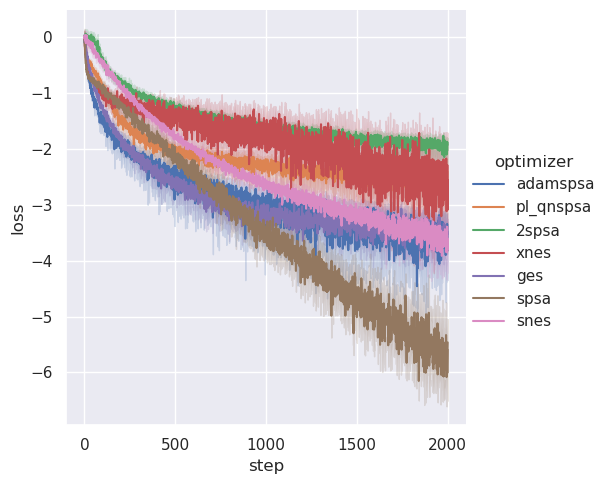

In [36]:
# Convergence plots 

# curr_data = ising_1d_runs
# curr_data = random_ham_runs
curr_data = heisenburg_2d_runs

sns.set_theme()
# sns.set_context("paper")
ax = sns.relplot(data=curr_data, x="step", y="loss", hue="optimizer", kind="line")
ax.set(xlabel='Step', ylabel='Energy')

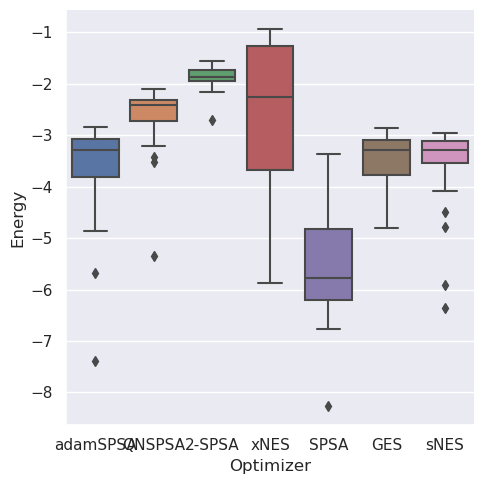

In [70]:
# Box / Violin Plots of converged results

# curr_data = ising_1d_runs
# curr_data = random_ham_runs
curr_data = heisenburg_2d_runs

sns.set_theme()
# sns.set_context("paper")
final_data = get_final_values(curr_data)
ax = sns.catplot(data=final_data, x="optimizer", y="loss", kind="box")
# sns.catplot(data=final_data, x="optimizer", y="loss", kind="boxen")
# sns.catplot(data=final_data, x="optimizer", y="loss", kind="violin")
# sns.catplot(data=final_data, x="optimizer", y="loss", kind="violin", inner="stick", bw=0.25, cut=0)
ax.set(xlabel='Optimizer', ylabel='Energy')

In [38]:
# Other random testing / debugging

print(heisenburg_2d_runs)

     step  num_shots      loss optimizer  rand_seed             run_name
0       7         14 -0.035234  adamspsa       6133  celestial-sweep-100
1       9         18 -0.073015  adamspsa       6133  celestial-sweep-100
2      11         22 -0.278534  adamspsa       6133  celestial-sweep-100
3      12         24 -0.307376  adamspsa       6133  celestial-sweep-100
4      13         26 -0.298316  adamspsa       6133  celestial-sweep-100
..    ...        ...       ...       ...        ...                  ...
495  1978       3956 -3.385027      spsa       5632      hopeful-sweep-1
496  1984       3968 -3.386930      spsa       5632      hopeful-sweep-1
497  1990       3980 -3.389650      spsa       5632      hopeful-sweep-1
498  1993       3986 -3.390977      spsa       5632      hopeful-sweep-1
499  1995       3990 -3.393529      spsa       5632      hopeful-sweep-1

[350000 rows x 6 columns]
